# IA Notebook #3 |  Descenso del Gradiente (Gradient Descent)

Este es un notebook conducido originalmente por Carlos Santana Vega, re-escrito y comentado por Luis Arturo Cruz Cruz. Puedes consultar la fuente original en: https://www.youtube.com/watch?v=-_A_AAxqzCg&t=610s

El objetivo de este ejercicio es encontrár los puntos mínimos de una función espacial (superficie) mediante el método del descenso del grdiente.

In [1]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

Lo primero que demos establecer es una función optimizar, esta ecuación no representa ningúna función de coste en especial, solo es una superficie con crestas y valles.

La función en cuestión es la siguiente:

$$F(x,y)=sin(\frac{1}{2}x^{2}-\frac{1}{4}y^{2}+3)cos(2x+1-e^{y})$$

In [2]:
func = lambda th : np.sin((0.5*(th[0]**2))-(0.25*(th[1]**2))+3)*np.cos(2*th[0] + 1 -np.e**th[1])

In [3]:
func([5,3])

-0.5956138973318122

A continuación, debemos preparar los espacios lineales para representar la superficie característica de la función. Lo que hacemos es generar un número de valores en X, Y entre -2 y 2. Para luego introducirlos en la función, sacar Z y poder graficarla.

In [21]:
# Vector de -2 a 2 que genere 100 valores
res = 500
_X = np.linspace(-5,5, res) 
_Y = np.linspace(-5,5, res)
_Z = np.zeros((res,res))

#A continuación generamos el espacio de la variable depemndiente Z

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x,y]) 

#Nota: Los indices estan al revés porque el orden de una matriz suele ser
#primero las filas (eje y) y luego las columnas (eje x).

In [22]:
_Z

array([[-1.58915234e-01, -2.43354486e-01, -3.21239401e-01, ...,
        -3.01253268e-02, -1.14990043e-02, -4.02072920e-04],
       [-1.13744276e-01, -1.99919990e-01, -2.79995926e-01, ...,
        -2.62989529e-02, -9.47637187e-03, -3.04742476e-04],
       [-6.84666291e-02, -1.56157510e-01, -2.38216607e-01, ...,
        -2.24106883e-02, -7.42568929e-03, -1.93847435e-04],
       ...,
       [ 5.29410379e-02,  1.27870408e-01,  2.06369733e-01, ...,
         2.60250595e-01,  1.65004694e-01,  6.99868927e-02],
       [-1.07348158e-01, -1.96617699e-01, -2.86939292e-01, ...,
        -2.73403719e-01, -1.86456902e-01, -1.01295783e-01],
       [ 1.64307088e-01,  2.59734107e-01,  3.54016395e-01, ...,
         2.70849764e-01,  1.93496707e-01,  1.19022415e-01]])

Una vez generado el espacio característico de la función, ahora vamos a preparar las curvas de nivel

<function matplotlib.pyplot.show(close=None, block=None)>

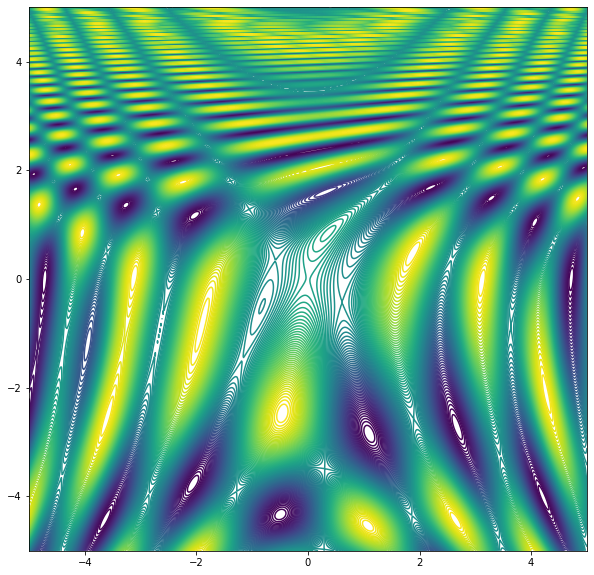

In [32]:
plt.contour(_X,_Y,_Z, 100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

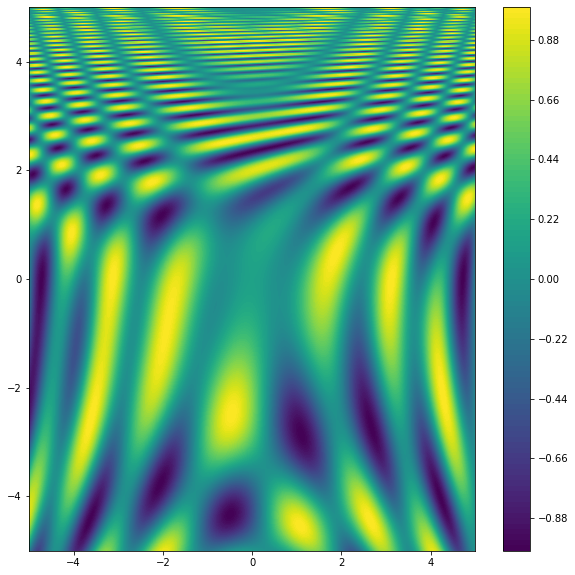

In [33]:
#en versión difusa 
plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()
plt.show

Ahora vamos a posicionarnos en un punto aleatorio dentro de la superficie, y una vez hecho eso implementaremos el método del gradiente.

<function matplotlib.pyplot.show(close=None, block=None)>

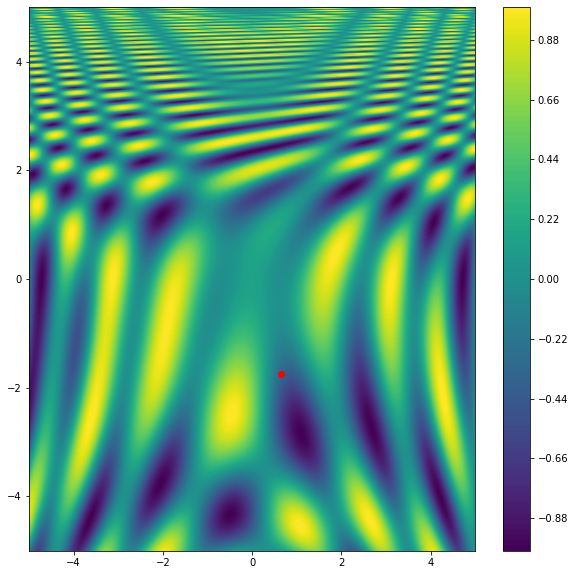

In [57]:
plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()

Theta = np.random.rand(2)*4 - 2 #Theta es el punto aleatorio sobre el mapa de curvas

plt.plot(Theta[0], Theta[1], "o", c = "red")
plt.show

En la analogía del montañista sobre el terreno siniuoso, ya tenemos el terreno (la superficie característica de la función) y al montañista (punto Theta que se localiza inicialmente en coordenadas aleatorias dentro del dominio de la función).

Es ahora tiempo de escribir el algoritmo del descenso del gradiente.

**Método de las diferencias finitas**: La derivada no se calcula como tal, sino que se calcula la pendiente entre dos puntos, el punto actual (theta) y otro valor (theta + h). De ahí se saca la pendiente y se decide hacia donde dirigirse. *https://en.wikipedia.org/wiki/Finite_difference*

In [41]:
Theta = np.random.rand(2)*4 - 2 
Theta = np.array([0, -2.2])

<function matplotlib.pyplot.show(close=None, block=None)>

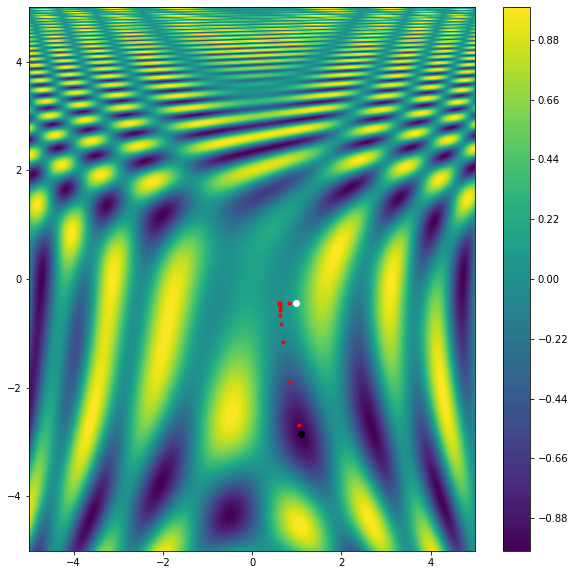

In [56]:
#Metodo del gradiente

plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()

# Theta es el punto aleatorio de inicialización del parámetro
Theta = np.random.rand(2)*4 - 2 
# Esto sería si queremos inicializarlo en un punto concreto
# Theta = np.array([-2.1, -1])

# Ploteamos de blanco el theta inicial
plt.plot(Theta[0], Theta[1], "o", c = "white") 

#Sea h el pequeño incremento para el método de las diferencias finitas.
h = 0.0001

# Vector gradiente (se inicializa en cero)
grad = np.zeros(2) 

# Learning rate
lr = 0.15

# Cuantas actualizaciones vamos a hacer
for _ in range(100000):
    # Hacemos este calculo para cada componente de theta (en este caso dos)
    for i, th in enumerate(Theta):
        # Copiamos theta
        _T = np.copy(Theta)
        # A la componente i de theta (la nueva) le sumamos h
        _T[i] = _T[i] + h
        # Calculamos [(theta + h) - theta]/h para saber la pendiente
        deriv = (func(_T) - func(Theta))/h
        # Actualizamos la pendiente en el vector pendiente
        grad[i] = deriv

    # Modificamos theta en learning_rate * gradiente. Si hay más pendiente (gradiente) se avanza más
    Theta = Theta - lr*grad
    
    # Cuando se hayan avanzado 10 puntos ploteamos el nuevo punto
    if ( _ % 10 == 0):
        plt.plot(Theta[0], Theta[1], ".", c = "red")
    
# Ploteamos el punto final
plt.plot(Theta[0], Theta[1], "o", c = "black")
plt.rcParams["figure.figsize"] = (10,10)
plt.show

## Fin del Notebook